In [13]:
#Importing all libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm
from random import random as rand
import seaborn as sns

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


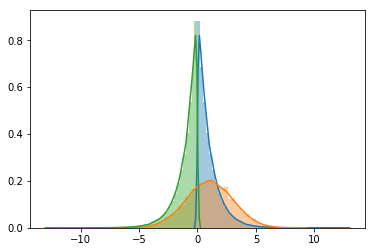

In [2]:
#Trying to visualize (very crude) , Solutions are in the next cell 
a=np.random.exponential(1,100000)
b=np.random.normal(1,2,10000)
c=-a
sns.distplot(a)
sns.distplot(b)
sns.distplot(c)

0.5005


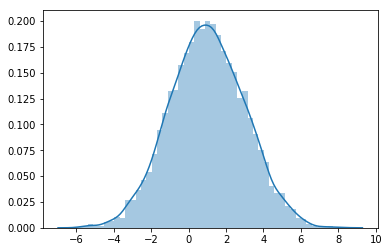

In [9]:
# PDF of Exponential
# Where Lambda=1, given in the question.

def pdf_exponential(x,lamda=1):
    return lamda*np.exp(-x*lamda)
def gauss_value(x,lamda=1,mu=0):
    return (1/np.sqrt(2*np.pi*lamda**2))*np.exp(-((x-mu)**2)/(2*lamda**2))

def generate_exp(N,lamda=1):
    u = np.random.uniform(size=(N))
    return (-1/lamda)*np.log(1-u)

def envelope(lamda=1,mu=0):
    y = generate_exp(N=10000)
    # i = y1, y2, ... yn
    U = []
    for i in y:
        U.append(np.random.uniform(low=0,high=pdf_exponential(i)))
    accepted = y[U<gauss_value(y,lamda,mu=0)]
    return np.array(accepted)

a = envelope()
# a is N(0,1)+

b = envelope()
b = -b
# b is N(0,1)-
# final = N(0,1)

print((b.size+a.size)/20000)
final = np.append(a,b)*2+1
sns.distplot(final)

### Solution 2

$\#(m) \propto m^{-3/2}$
$\#(m) = 10000*m^{-3/2} $
from the data given.

Taking log 
$log(\#(m)) = log(10000)-3/2*log(m) $

Now to find support we find x-intercept 
$$ 0 = log(10000)-3/2*log(m) \implies log(m) = 2/3* log(10000) \implies m = 10^8/3 $$ 

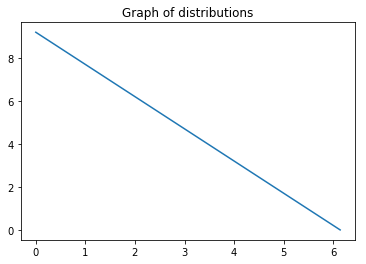

In [14]:
#Getting log m value
logm=np.arange(0,((2/3)*np.log(10000)),0.01)
##Geting log(#m) value
log_number_m=np.log(10000)-(3/2)*logm
plt.title("Graph of distributions")
plt.plot(logm,log_number_m)

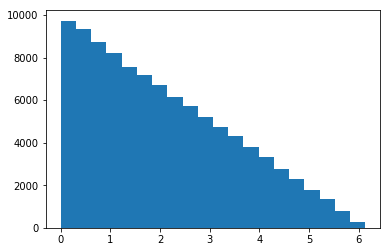

In [19]:
###Rejection Sampling of log(m)
samples = []
#Number of samples
n_samples =100000
n=0
##X-intercept
support = [0,(2/3)*np.log(10000)]
#print(support)
m = np.log(10000)

#sample Generation
while n<n_samples:
    x = rand()*support[1]
    f_x = np.log(10000)-(3/2)*x
    y = rand()
    if(y<=f_x/m):
        samples.append(x)
        n+=1
##Just plotting the histogram for visual purposes
plt.hist(samples,bins=20)
plt.show()

In [20]:
##lograthmic binning algorithm
def binning(data,r,R):
    i = np.arange(-R,R)
    #widths of the bins
    delta_i = np.exp(i/r)-np.exp((i-1)/r)
    #Ca
    bins = [sum(delta_i[:i]) for i in range(len(delta_i)+1)]
    m = np.exp(data)
    val = np.zeros(len(bins)+1)
    for m_i in m:
        bin_loc = np.argwhere(m_i<bins)[0][0] 
        val[bin_loc]+= 1
        
    bins_mid = [ (bins[i]+bins[i+1])/2  for i in range(len(bins)-1)]
    return bins_mid,bins,val

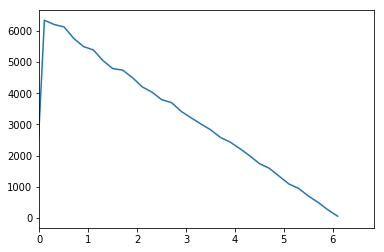

In [41]:
#Trying different values of r,R. Found this to be the most appropriate
r=5
R=32
x_val,bins,y_val=binning(samples,r,R)
plt.plot(np.log(x_val),(y_val[1:-1]))
plt.xlim(0)
plt.show()

#Hopefully this is somewhat correct as the graphs are pretty similar
#print(bins)
